In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import h5py
import time

# Monte Carlo data

In [2]:
inputMC = 'data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'

In [3]:
tickMC = time.perf_counter()
df_reco = pd.read_hdf(inputMC, key='LHCbMC_Lb')
tockMC = time.perf_counter()
print(f"Monte Carlo imported in {tockMC - tickMC:0.4f} seconds.")
df_reco

Monte Carlo imported in 30.9462 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.952388,-0.165336,26.651770,402.777832,-229.470520,5536.814453,0.9524,-0.1653,26.652201,1910.136719,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.845292,-0.195122,3.622388,139.395874,322.585419,7428.522461,0.8453,-0.1950,3.620400,481.652618,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.480003,-0.762014,18.670696,-819.340149,-626.124390,5389.564453,-0.4801,-0.7620,18.671101,-5395.257812,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.681797,-2.255294,-36.569271,113.645294,-329.222229,4678.392090,1.6818,-2.2553,-36.569199,7835.708984,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
4,0.824895,-0.252737,74.871048,-100.702072,60.565861,6466.218750,0.8242,-0.2542,74.883598,-74.406654,...,135.662018,8106.856445,-3448.149902,-1045.294434,90591.554688,588.637329,239.301941,10912.332031,T,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.964920,0.161698,-12.157676,293.129822,39.016293,7097.797363,0.9649,0.1621,-12.151800,3175.616943,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.498788,1.215896,21.856564,-176.847626,145.914993,8691.596680,-0.5001,1.2166,21.869101,-2664.720215,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.114458,-0.046962,25.276293,-29.465662,-15.364128,949.110657,0.1145,-0.0469,25.275400,-6107.898926,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [4]:
tickMCTruth = time.perf_counter()
df_truth = pd.read_hdf(inputMC, key='LHCbMCTruth_Lb')
tockMCTruth = time.perf_counter()
print(f"Monte Carlo Truth imported in {tockMCTruth - tickMCTruth:0.4f} seconds.")
df_truth

Monte Carlo Truth imported in 223.0350 seconds.


,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,mup_PP_X,mup_PP_Y,mup_PP_Z,mup_PP_PX,mup_PP_PY,mup_PP_PZ,mup_PP_Weight,Rec_key,N_rec_matches,TrackType
MC_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,0.6208,-0.5355,21.231701,1448.819824,1628.266357,23763.910156,0.975000,0,1,T
1,0.4619,-0.3471,-52.081200,-19.765400,-33.384300,45.136002,-1190.050049,-1817.560059,5618.410156,-125.169998,...,0.2795,-0.4641,-50.938000,-3430.944092,-2054.681885,20444.863281,1.000000,-1,0,NA
2,0.8623,-0.0693,39.078201,145.114395,-70.015701,2563.685059,1349.000000,-574.190002,22276.189453,239.940002,...,0.1603,-0.3852,34.265598,1869.628418,869.200012,13080.188477,1.000000,-1,0,NA
3,0.8441,-0.1694,17.714300,-9.207400,27.546700,3520.887207,-295.320007,790.229980,93841.296875,3.170000,...,0.4994,-0.5171,14.525300,491.177612,513.784912,5034.924805,1.000000,-1,0,NA
4,0.6610,-0.4327,7.083600,-23.592199,-54.290798,201.384293,-1843.489990,-4303.959961,15525.910156,-361.470001,...,-0.0085,-0.3661,9.187500,-2067.989014,93.588974,6374.103027,1.000000,-1,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921810,0.7382,-0.1062,0.347100,-2.454600,0.459400,68.980499,-1052.079956,169.649994,21721.480469,-270.470001,...,0.5466,-0.3809,3.584800,-1646.731689,-2497.763672,30773.214844,0.942857,-1,0,NA
8921811,0.6401,-0.0814,27.420200,4.920900,-10.475100,58.229698,680.200012,-1542.880005,4852.310059,153.279999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,NA
8921812,2.0908,-1.0901,46.602200,36.268501,-29.632999,1175.768677,4569.680176,-3904.929932,153438.671875,582.070007,...,0.3603,0.4048,30.488100,1073.656860,-936.144836,10031.811523,0.975000,-1,0,NA


In [5]:
tickMerge = time.perf_counter()
df_MC = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
tockMerge = time.perf_counter()
print(f"Monte Carlo merged in {tockMerge - tickMerge:0.4f} seconds.")

Monte Carlo merged in 3.3918 seconds.


In [6]:
df_MC = df_MC.loc[(df_MC['MC_key'] >= 0) & (df_MC['Rec_key'] >= 0)]

# Selection studies

In [7]:
totEvents = len(df_MC)
totEvents

307460

## Study on $\texttt{L_ENDVERTEX_Z}$
### $\texttt{L_ENDVERTEX_Z} >z_\text{cut}$

In [8]:
L_zLeftCuts = np.array([z for z in range(0,9000,100)])
L_zLeftEfficiencies = np.array([len(df_MC.loc[df_MC['L_ENDVERTEX_Z'] > cut])/totEvents for cut in L_zLeftCuts])

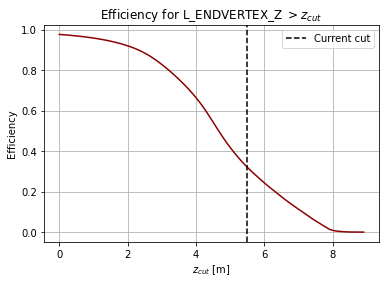

In [9]:
plt.plot(L_zLeftCuts/1000, L_zLeftEfficiencies, color='darkred')
plt.axvline(x=5.5, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$z_{cut}$ [m]')
plt.ylabel("Efficiency")
plt.title("Efficiency for L_ENDVERTEX_Z $> z_{cut}$")
plt.legend()
plt.show()

### $\texttt{L_ENDVERTEX_Z} < z_\text{cut}$

In [10]:
L_zRightCuts = np.array([z for z in range(0,9000,100)])
L_zRightEfficiencies = np.array([len(df_MC.loc[df_MC['L_ENDVERTEX_Z'] < cut])/totEvents for cut in L_zRightCuts])

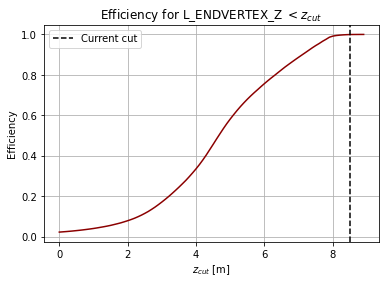

In [11]:
plt.plot(L_zRightCuts/1000, L_zRightEfficiencies, color='darkred')
plt.axvline(x=8.5, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$z_{cut}$ [m]')
plt.ylabel("Efficiency")
plt.title("Efficiency for L_ENDVERTEX_Z $< z_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{L_M}$
### $\texttt{L_M} > M_\text{cut}$

In [12]:
L_mLeftCuts = np.array([m for m in range(0,5000,100)])
L_mLeftEfficiencies = np.array([len(df_MC.loc[df_MC['L_M'] > cut])/totEvents for cut in L_mLeftCuts])

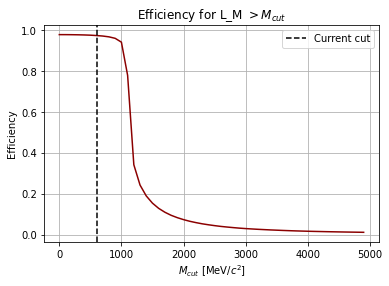

In [13]:
plt.plot(L_mLeftCuts, L_mLeftEfficiencies, color='darkred')
plt.axvline(x=600, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$M_{cut}$ [MeV/$c^2$]')
plt.ylabel("Efficiency")
plt.title("Efficiency for L_M $> M_{cut}$")
plt.legend()
plt.show()

### $\texttt{L_M} < M_\text{cut}$

In [14]:
L_mRightCuts = np.array([m for m in range(0,5000,100)])
L_mRightEfficiencies = np.array([len(df_MC.loc[df_MC['L_M'] < cut])/totEvents for cut in L_mRightCuts])

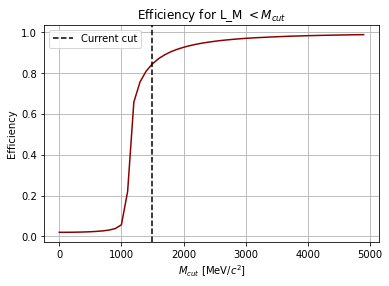

In [15]:
plt.plot(L_mRightCuts, L_mRightEfficiencies, color='darkred')
plt.axvline(x=1500, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$M_{cut}$ [MeV/$c^2$]')
plt.ylabel("Efficiency")
plt.title("Efficiency for L_M $< M_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{L_MM}$

### $\texttt{L_MM} < M_\text{cut}$

In [47]:
L_mmRightCuts = np.array([mm for mm in range(0,5000,100)])
L_mmRightEfficiencies = np.array([len(df_MC.loc[df_MC['L_MM'] < cut])/totEvents for cut in L_mmRightCuts])

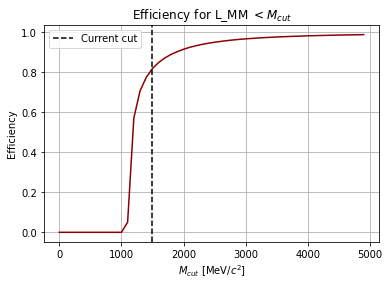

In [48]:
plt.plot(L_mmRightCuts, L_mmRightEfficiencies, color='darkred')
plt.axvline(x=1500, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$M_{cut}$ [MeV/$c^2$]')
plt.ylabel("Efficiency")
plt.title("Efficiency for L_MM $< M_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{L_BPVDIRA}$
### $\texttt{L_BPVDIRA} > \cos\theta_\text{cut}$

In [16]:
L_DiraLeftCuts = np.array([costheta for costheta in np.arange(0.999,1,0.00001)])
L_DiraLeftEfficiencies = np.array([len(df_MC.loc[df_MC['L_BPVDIRA'] > cut])/totEvents for cut in L_DiraLeftCuts])

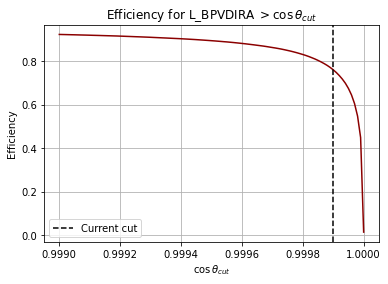

In [17]:
plt.plot(L_DiraLeftCuts, L_DiraLeftEfficiencies, color='darkred')
plt.axvline(x=0.9999, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel(r'$\cos{\theta}_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for L_BPVDIRA $> \cos{\theta}_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{L_BPVIPCHI2}$
### $\texttt{L_BPVIPCHI2} < \Delta\chi^2_\text{cut}$

In [18]:
L_IPCHI2RightCuts = np.array([incr for incr in range(1,300,5)])
L_IPCHI2RightEfficiencies = np.array([len(df_MC.loc[df_MC['L_BPVIPCHI2'] < cut])/totEvents for cut in L_IPCHI2RightCuts])

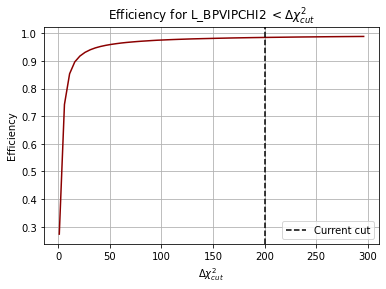

In [19]:
plt.plot(L_IPCHI2RightCuts, L_IPCHI2RightEfficiencies, color='darkred')
plt.axvline(x=200, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$\Delta\chi^2_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for L_BPVIPCHI2 $< \Delta\chi^2_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{L_BPVVDCHI2}$
### $\texttt{L_BPVVDCHI2} < \Delta\chi^2_\text{cut}$

In [20]:
L_VDCHI2RightCuts = np.array([incr for incr in np.geomspace(1,1e8,100)])
L_VDCHI2RightEfficiencies = np.array([len(df_MC.loc[df_MC['L_BPVVDCHI2'] < cut])/totEvents for cut in L_VDCHI2RightCuts])

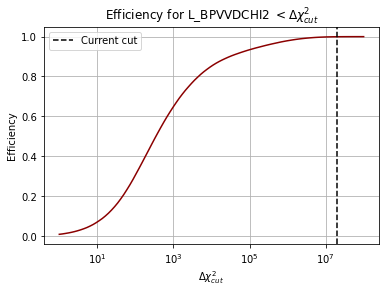

In [21]:
plt.plot(L_VDCHI2RightCuts, L_VDCHI2RightEfficiencies, color='darkred')
plt.axvline(x=2e7, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$\Delta\chi^2_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for L_BPVVDCHI2 $< \Delta\chi^2_{cut}$")
plt.legend()
plt.xscale('log')
plt.show()

## Study on $\texttt{L_VFASPF_CHI2_VDOF}$
### $\texttt{L_VFASPF_CHI2_VDOF} < \chi^2_\text{cut}$

In [22]:
L_CHI2VDOF_RightCuts = np.array([incr for incr in np.linspace(1,1000,100)])
L_CHI2VDOF_RightEfficiencies = np.array([len(df_MC.loc[df_MC['L_VFASPF_CHI2_VDOF'] < cut])/totEvents for cut in L_CHI2VDOF_RightCuts])

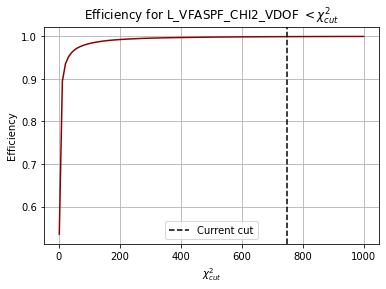

In [23]:
plt.plot(L_CHI2VDOF_RightCuts, L_CHI2VDOF_RightEfficiencies, color='darkred')
plt.axvline(x=750, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$\chi^2_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for L_VFASPF_CHI2_VDOF $< \chi^2_{cut}$")
plt.legend()
plt.show()

## Study on $\Lambda$ transverse momentum
### $p_T > {p_T}_\text{cut}$

In [24]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

In [25]:
L_PT = TransverseMomentumModulus(df_MC['L_PX'], df_MC['L_PY'])

L_PT_LeftCuts = np.array([p for p in np.linspace(0,5000,100)])
L_PT_LeftEfficiencies = np.array([len(df_MC.loc[L_PT > cut])/totEvents for cut in L_PT_LeftCuts])

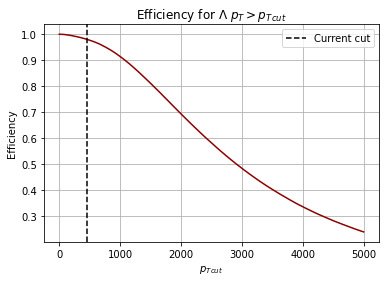

In [26]:
plt.plot(L_PT_LeftCuts, L_PT_LeftEfficiencies, color='darkred')
plt.axvline(x=450, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${p_T}_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for $\Lambda$ $p_T > {p_T}_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{Lb_M}$

### $\texttt{Lb_M} < M_\text{cut}$

In [29]:
Lb_M_RightCuts = np.array([m for m in range(0,10000,100)])
Lb_M_RightEfficiencies = np.array([len(df_MC.loc[df_MC['Lb_M'] < cut])/totEvents for cut in Lb_M_RightCuts])

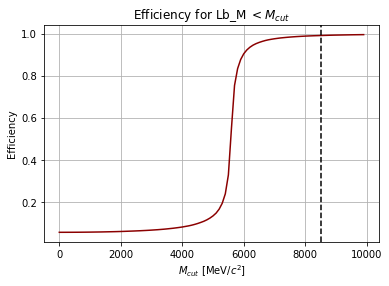

In [30]:
plt.plot(Lb_M_RightCuts, Lb_M_RightEfficiencies, color='darkred')
plt.axvline(x=8500, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$M_{cut}$ [MeV/$c^2$]')
plt.ylabel("Efficiency")
plt.title("Efficiency for Lb_M $< M_{cut}$")
#plt.legend()
plt.show()

## Study on $\texttt{Lb_BPVDIRA}$
### $\left| \texttt{Lb_BPVDIRA} \right| > \cos\theta_\text{cut}$
Maybe improve with single cuts on positive and negative?

In [49]:
Lb_DiraMod_Cuts = np.array([costheta for costheta in np.linspace(0.98,1,100)])
Lb_DiraMod_Efficiencies = np.array([len(df_MC.loc[abs(df_MC['Lb_BPVDIRA']) > cut])/totEvents
                                    for cut in Lb_DiraMod_Cuts])

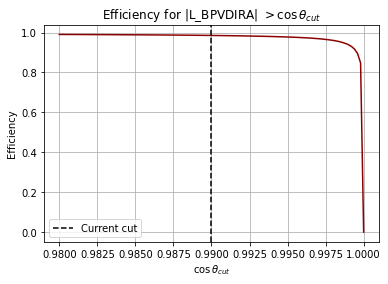

In [50]:
plt.plot(Lb_DiraMod_Cuts, Lb_DiraMod_Efficiencies, color='darkred')
plt.axvline(x=0.99, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel(r'$\cos{\theta}_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for |L_BPVDIRA| $> \cos{\theta}_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{Lb_BPVIPCHI2}$
### $\texttt{Lb_BPVIPCHI2} < \Delta\chi^2_\text{cut}$

In [33]:
Lb_IPCHI2RightCuts = np.array([incr for incr in range(1,2000,10)])
Lb_IPCHI2RightEfficiencies = np.array([len(df_MC.loc[df_MC['Lb_BPVIPCHI2'] < cut])/totEvents for cut in Lb_IPCHI2RightCuts])

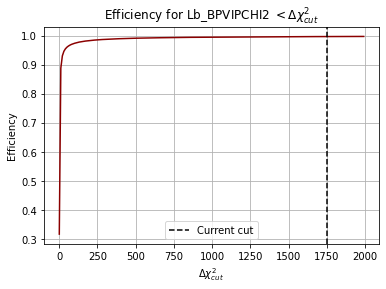

In [34]:
plt.plot(Lb_IPCHI2RightCuts, Lb_IPCHI2RightEfficiencies, color='darkred')
plt.axvline(x=1750, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$\Delta\chi^2_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for Lb_BPVIPCHI2 $< \Delta\chi^2_{cut}$")
plt.legend()
plt.show()

## Study on $\texttt{Lb_VFASPF_CHI2_VDOF}$
### $\texttt{Lb_VFASPF_CHI2_VDOF} < \chi^2_\text{cut}$

In [35]:
Lb_CHI2VDOF_RightCuts = np.array([incr for incr in [*range(1,50,2), *range(50,200,10)]])
Lb_CHI2VDOF_RightEfficiencies = np.array([len(df_MC.loc[df_MC['Lb_VFASPF_CHI2_VDOF'] < cut])/totEvents for cut in Lb_CHI2VDOF_RightCuts])

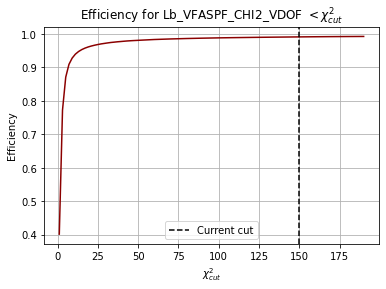

In [36]:
plt.plot(Lb_CHI2VDOF_RightCuts, Lb_CHI2VDOF_RightEfficiencies, color='darkred')
plt.axvline(x=150, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('$\chi^2_{cut}$')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for Lb_VFASPF_CHI2_VDOF $< \chi^2_{cut}$")
plt.legend()
plt.show()

## Study on proton momentum
### $p > p_\text{cut}$

In [37]:
p_P = MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ'])

p_P_LeftCuts = np.array([incr for incr in range(1,100000,1000)])
p_P_LeftEfficiencies = np.array([len(df_MC.loc[p_P > cut])/totEvents for cut in p_P_LeftCuts])

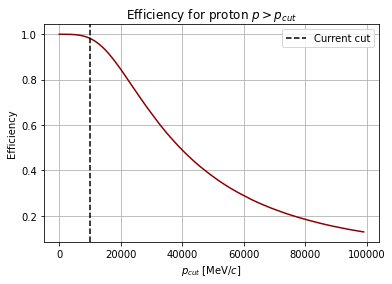

In [38]:
plt.plot(p_P_LeftCuts, p_P_LeftEfficiencies, color='darkred')
plt.axvline(x=1e4, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${p}_{cut}$ [MeV/$c$]')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for proton $p > p_{cut}$")
plt.legend()
plt.show()

### $p < p_\text{cut}$

In [54]:
p_P_RightCuts = np.array([incr for incr in range(80000,700000,10000)])
p_P_RightEfficiencies = np.array([len(df_MC.loc[p_P < cut])/totEvents for cut in p_P_RightCuts])

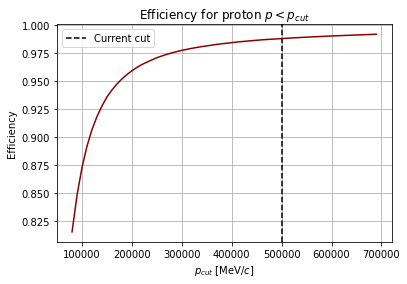

In [55]:
plt.plot(p_P_RightCuts, p_P_RightEfficiencies, color='darkred')
plt.axvline(x=5e5, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${p}_{cut}$ [MeV/$c$]')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for proton $p < p_{cut}$")
plt.legend()
plt.show()

## Study on proton transverse momentum
### $p_T > p_T^\text{cut}$

In [39]:
p_PT = TransverseMomentumModulus(df_MC['p_PX'], df_MC['p_PY'])

p_PT_LeftCuts = np.array([incr for incr in range(1,8000,50)])
p_PT_LeftEfficiencies = np.array([len(df_MC.loc[p_PT > cut])/totEvents for cut in p_PT_LeftCuts])

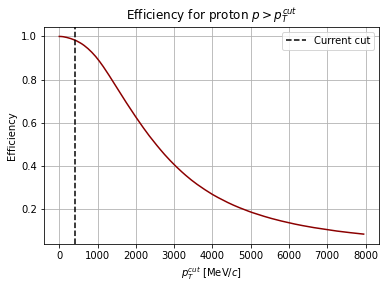

In [40]:
plt.plot(p_PT_LeftCuts, p_PT_LeftEfficiencies, color='darkred')
plt.axvline(x=400, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${p}_T^{cut}$ [MeV/$c$]')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for proton $p > p_T^{cut}$")
plt.legend()
plt.show()

## Study on pion momentum
### $p > p_\text{cut}$

In [41]:
pim_P = MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ'])

pim_P_LeftCuts = np.array([incr for incr in range(1,20000,200)])
pim_P_LeftEfficiencies = np.array([len(df_MC.loc[pim_P > cut])/totEvents for cut in pim_P_LeftCuts])

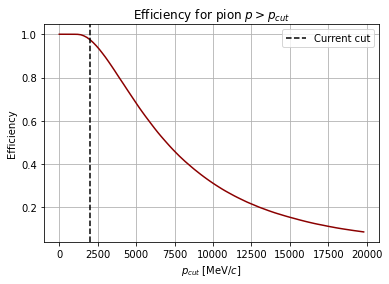

In [42]:
plt.plot(pim_P_LeftCuts, pim_P_LeftEfficiencies, color='darkred')
plt.axvline(x=2000, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${p}_{cut}$ [MeV/$c$]')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for pion $p > p_{cut}$")
plt.legend()
plt.show()

### $p < p_\text{cut}$

In [78]:
pim_P_RightCuts = np.array([p
                            for p in [
                                *range(int(5e3),int(1e5),int(5e3)),
                                *range(int(1e5),int(7e5),int(1e5))
                            ]])
pim_P_RightEfficiencies = np.array([len(df_MC.loc[pim_P < cut])/totEvents for cut in pim_P_RightCuts])

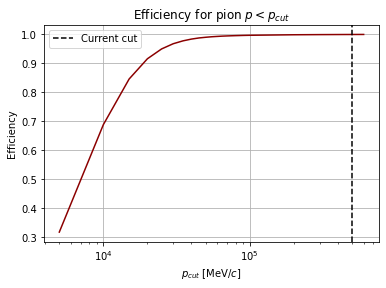

In [81]:
plt.plot(pim_P_RightCuts, pim_P_RightEfficiencies, color='darkred')
plt.axvline(x=5e5, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${p}_{cut}$ [MeV/$c$]')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for pion $p < p_{cut}$")
plt.legend()
plt.xscale('log')
plt.show()

## Study on $\texttt{Jpsi_M}$
$\texttt{Jpsi_M} - M_{PDG} < \Delta_{cut}$

In [92]:
JPsi1SPDGMass = 3096.900
Jpsi_M_LeftCuts = np.array([delta for delta in range(0,110,5)])
Jpsi_M_LeftEfficiencies = np.array([len(df_MC.loc[abs(df_MC['Jpsi_M'] - JPsi1SPDGMass) < cut])/totEvents for cut in Jpsi_M_LeftCuts])

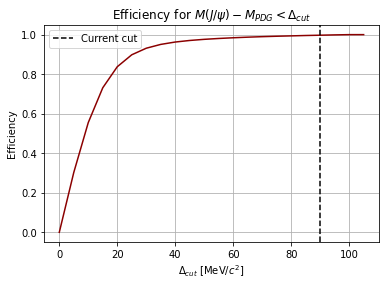

In [94]:
plt.plot(Jpsi_M_LeftCuts, Jpsi_M_LeftEfficiencies, color='darkred')
plt.axvline(x=90, color='k', linestyle='--', label='Current cut')
plt.grid()
plt.xlabel('${\Delta}_{cut}$ [MeV/$c^2$]')
plt.ylabel("Efficiency")
plt.title(r"Efficiency for $M(J/\psi)- M_{PDG} < \Delta_{cut}$")
plt.legend()
plt.show()